In [136]:
from pathlib import Path
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

results_path = Path('results')

# Singapore, hourly dataset

In [137]:
dataset_name = 'demand_sg'
test_pl = 72

## All features

dict_keys(['ConvLSTM', 'GRU', 'GRUAttention', 'LSTM', 'MOIRAI_ft', 'MOIRAI_zs', 'MOMENT_zs', 'MOMENT_ft', 'TTM_ft'])
[877824, 877824, 877824, 878544, 878472, 878472, 877824, 878544, 876888]


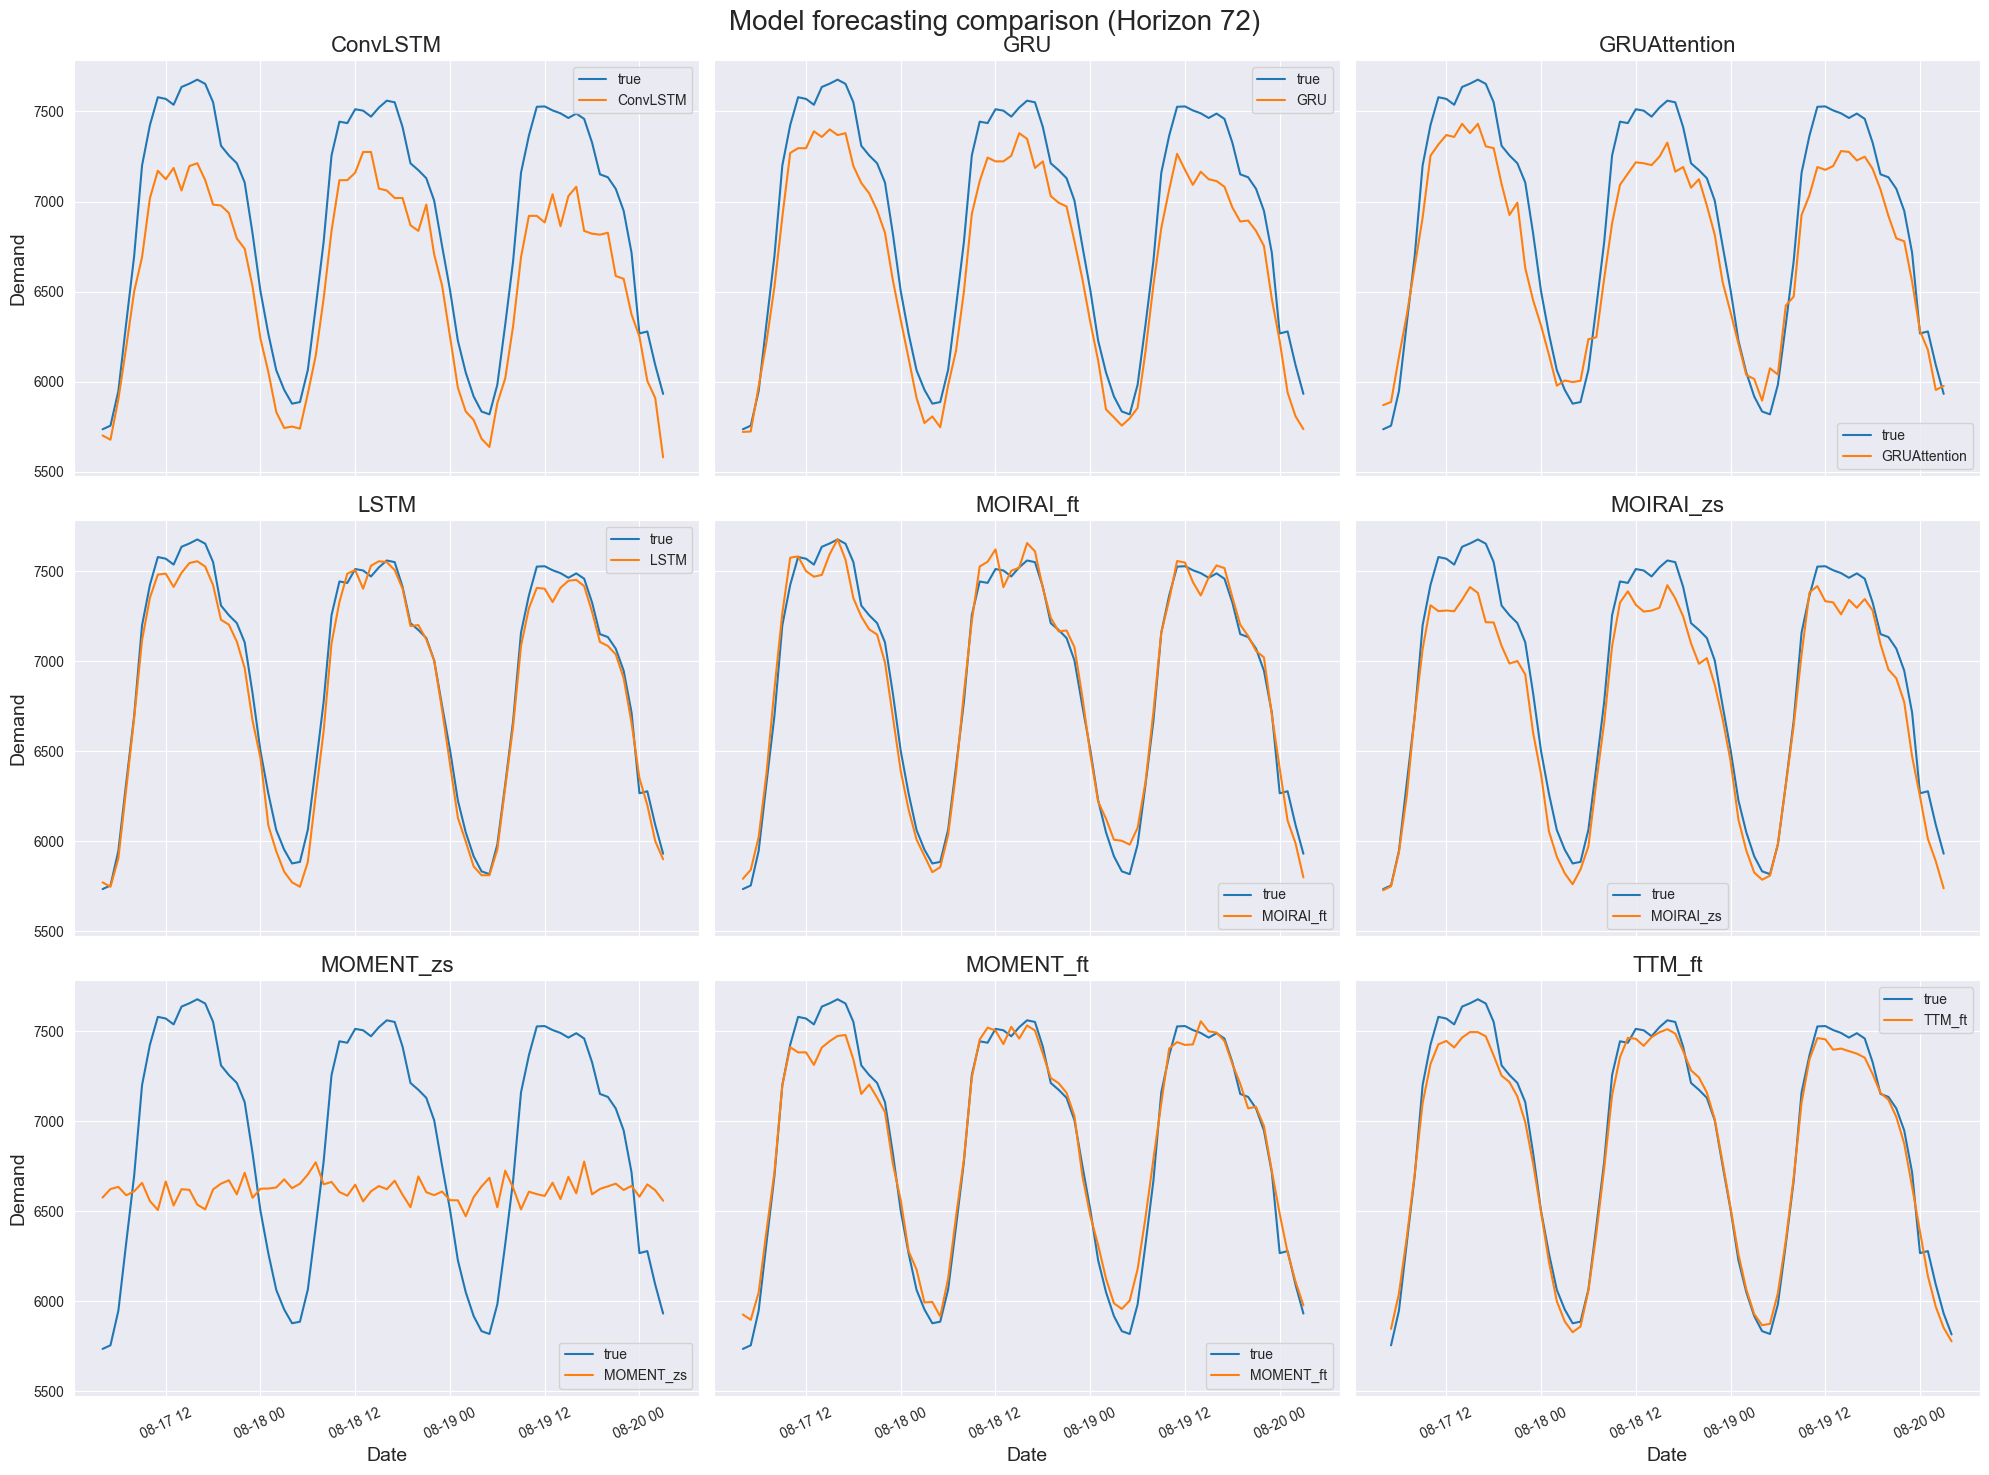

In [138]:
# indicate feature subset
features = 'all'
dataset_path = results_path / dataset_name / features
model_names = os.listdir(dataset_path)

# exclude unwanted datasets
# exclude = ['ConvLSTM', 'GRU', 'GRUAttention']
# model_names = [x for x in model_names if x not in exclude]

# load in all the datasets into a dictionary
datasets = {}
for model_name in model_names:
    model_path = dataset_path / model_name
    
    for filename in model_path.iterdir():
        if str(test_pl) in filename.name:
            df = pd.read_csv(filename)
            if 'date' in df:
                df['date'] = pd.to_datetime(df['date'])
                
            if any(x in filename.name for x in ['zero', 'base']):
                datasets[model_name + '_zs'] = df
            elif any(x in filename.name for x in ['tuned', 'fullshot', 'lp']):
                datasets[model_name + '_ft'] = df
            else:
                datasets[model_name] = df

# just because LSTM doesn't have a date column
if 'date' not in datasets['LSTM']:        
    datasets['LSTM']['date'] = datasets['MOMENT_ft']['date']
                
print(datasets.keys())
print([len(x) for x in datasets.values()])

# randomly select a window of length `test_pl`
min_data_length = min([len(x) for x in datasets.values()])
window_num = random.randrange(min_data_length // test_pl)

win_start = window_num * test_pl
win_end = win_start + test_pl

# Create subplots
fig, axes = plt.subplots(math.ceil(len(datasets) / 3), 3, figsize=(20, 15), sharex=True, sharey=True)
fig.suptitle(f'Model forecasting comparison (Horizon {test_pl})', fontsize=20)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, (col, df) in enumerate(datasets.items()):
    # get the pred column name
    df = df.iloc[win_start:win_end]
    pred_col = [col for col in df.columns if 'pred' in col.lower() or 'actual' in col.lower()][0]
    
    sns.lineplot(data=df, x='date', y='true', ax=axes[i], label='true')
    sns.lineplot(data=df, x='date', y=pred_col, ax=axes[i], label=col, errorbar='pi')

    axes[i].set_title(f'{col}', fontsize=16)
    axes[i].set_xlabel('Date', fontsize=14)
    axes[i].set_ylabel('Demand', fontsize=14)
    axes[i].tick_params(axis='x', labelrotation=25)
    axes[i].legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

## Top 9 features

In [101]:
# indicate feature subset
features = 'top9'
dataset_path = results_path / dataset_name / features
model_names = os.listdir(dataset_path)

# exclude unwanted datasets
# exclude = ['ConvLSTM', 'GRU', 'GRUAttention']
# model_names = [x for x in model_names if x not in exclude]

# load in all the datasets into a dictionary
datasets = {}
for model_name in model_names:
    model_path = dataset_path / model_name
    
    for filename in model_path.iterdir():
        if str(test_pl) in filename.name:
            df = pd.read_csv(filename)
            if 'date' in df:
                df['date'] = pd.to_datetime(df['date'])
                
            if any(x in filename.name for x in ['zero', 'base']):
                datasets[model_name + '_zs'] = df
            elif any(x in filename.name for x in ['tuned', 'fullshot', 'lp']):
                datasets[model_name + '_ft'] = df
            else:
                datasets[model_name] = df

# just because LSTM doesn't have a date column
if 'date' not in datasets['LSTM']:        
    datasets['LSTM']['date'] = datasets['MOMENT_ft']['date']
                
print(datasets.keys())

# randomly select a window of length `test_pl`
min_data_length = min([len(x) for x in datasets.values()])
window_num = random.randrange(min_data_length // test_pl)

win_start = window_num * test_pl
win_end = win_start + test_pl

# Create subplots
fig, axes = plt.subplots(math.ceil(len(datasets) / 3), 3, figsize=(20, 15), sharex=True, sharey=True)
fig.suptitle(f'Model forecasting comparison (Horizon {test_pl})', fontsize=20)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, (col, df) in enumerate(datasets.items()):
    # get the pred column name
    df = df.iloc[win_start:win_end]
    pred_col = [col for col in df.columns if 'pred' in col.lower() or 'actual' in col.lower()][0]
    
    sns.lineplot(data=df, x='date', y='true', ax=axes[i], label='true')
    sns.lineplot(data=df, x='date', y=pred_col, ax=axes[i], label=col, errorbar='pi')

    axes[i].set_title(f'{col}', fontsize=16)
    axes[i].set_xlabel('Date', fontsize=14)
    axes[i].set_ylabel('Demand', fontsize=14)
    axes[i].tick_params(axis='x', labelrotation=25)
    axes[i].legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

dict_keys(['GRU', 'LSTM', 'MOIRAI_ft', 'MOIRAI_zs', 'MOMENT_ft', 'TTM_ft'])


NameError: name 'math' is not defined

## Top 5 features

dict_keys(['LSTM', 'MOIRAI_ft', 'MOIRAI_zs', 'MOMENT_ft'])


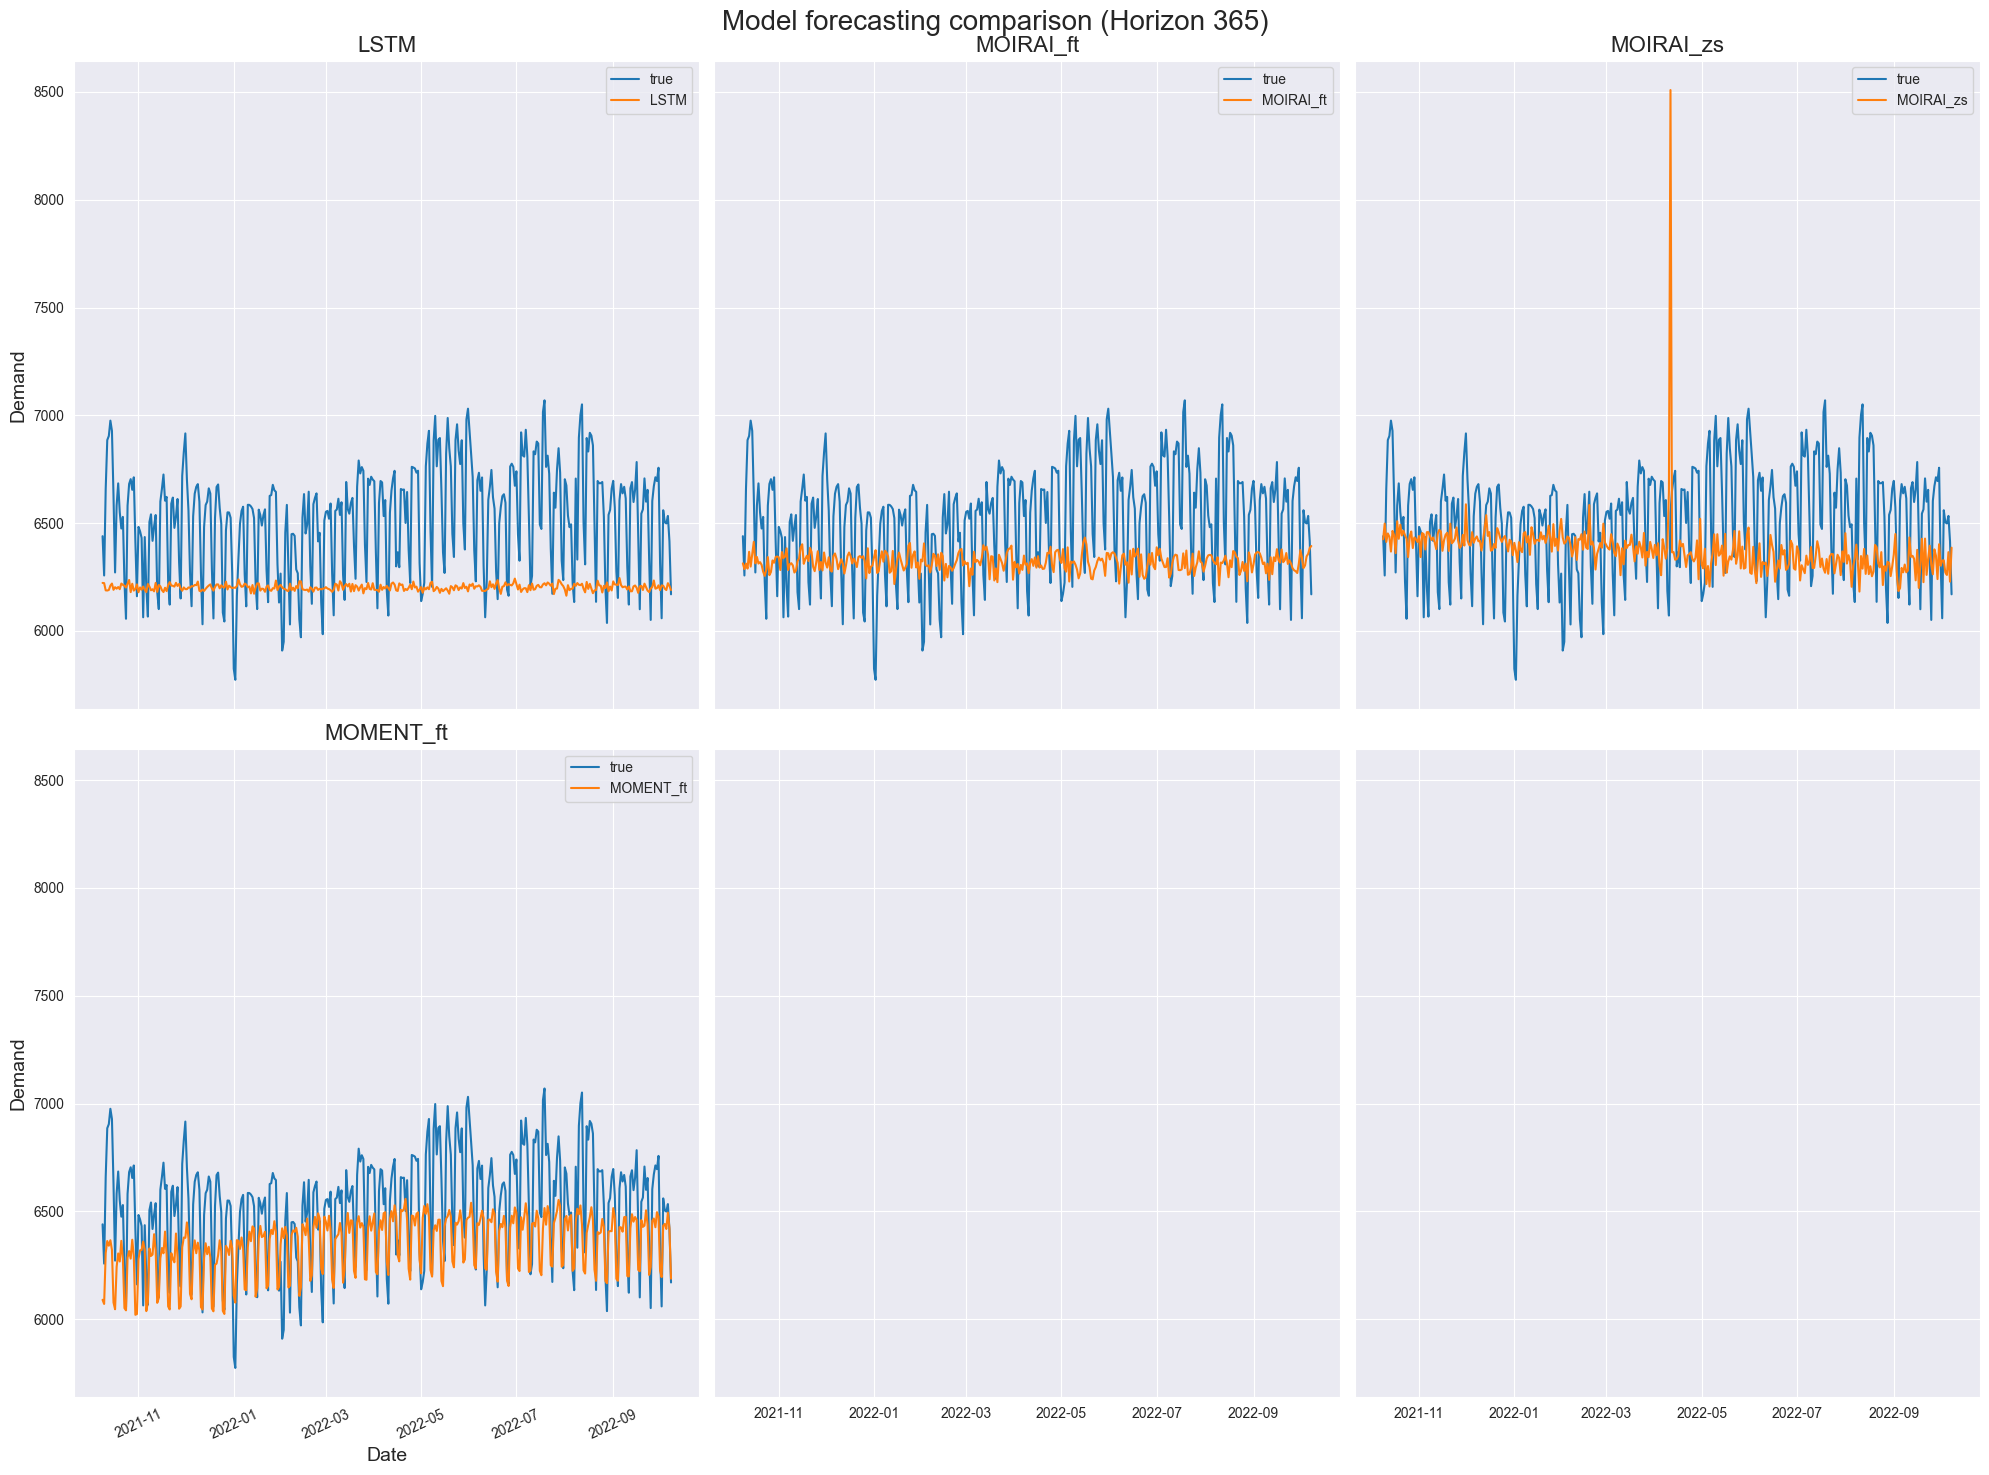

In [135]:
# indicate feature subset
features = 'top5'
dataset_path = results_path / dataset_name / features
model_names = os.listdir(dataset_path)

# exclude unwanted datasets
exclude = ['ConvLSTM', 'GRU', 'GRUAttention']
model_names = [x for x in model_names if x not in exclude]

# load in all the datasets into a dictionary
datasets = {}
for model_name in model_names:
    model_path = dataset_path / model_name
    
    for filename in model_path.iterdir():
        if str(test_pl) in filename.name:
            df = pd.read_csv(filename)
            if 'date' in df:
                df['date'] = pd.to_datetime(df['date'])
                
            if any(x in filename.name for x in ['zero', 'base']):
                datasets[model_name + '_zs'] = df
            elif any(x in filename.name for x in ['tuned', 'fullshot', 'lp']):
                datasets[model_name + '_ft'] = df
            else:
                datasets[model_name] = df

# just because LSTM doesn't have a date column
if 'date' not in datasets['LSTM']:        
    datasets['LSTM']['date'] = datasets['MOMENT_ft']['date']
                
print(datasets.keys())

# randomly select a window of length `test_pl`
min_data_length = min([len(x) for x in datasets.values()])
window_num = random.randrange(min_data_length // test_pl)

win_start = window_num * test_pl
win_end = win_start + test_pl

# Create subplots
fig, axes = plt.subplots(math.ceil(len(datasets) / 3), 3, figsize=(20, 15), sharex=True, sharey=True)
fig.suptitle(f'Model forecasting comparison (Horizon {test_pl})', fontsize=20)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, (col, df) in enumerate(datasets.items()):
    # get the pred column name
    df = df.iloc[win_start:win_end]
    pred_col = [col for col in df.columns if 'pred' in col.lower() or 'actual' in col.lower()][0]
    
    sns.lineplot(data=df, x='date', y='true', ax=axes[i], label='true')
    sns.lineplot(data=df, x='date', y=pred_col, ax=axes[i], label=col, errorbar='pi')

    axes[i].set_title(f'{col}', fontsize=16)
    axes[i].set_xlabel('Date', fontsize=14)
    axes[i].set_ylabel('Demand', fontsize=14)
    axes[i].tick_params(axis='x', labelrotation=25)
    axes[i].legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

## Historical target only

dict_keys(['LSTM', 'MOIRAI_ft', 'MOIRAI_zs', 'MOMENT_ft', 'TTM_ft'])


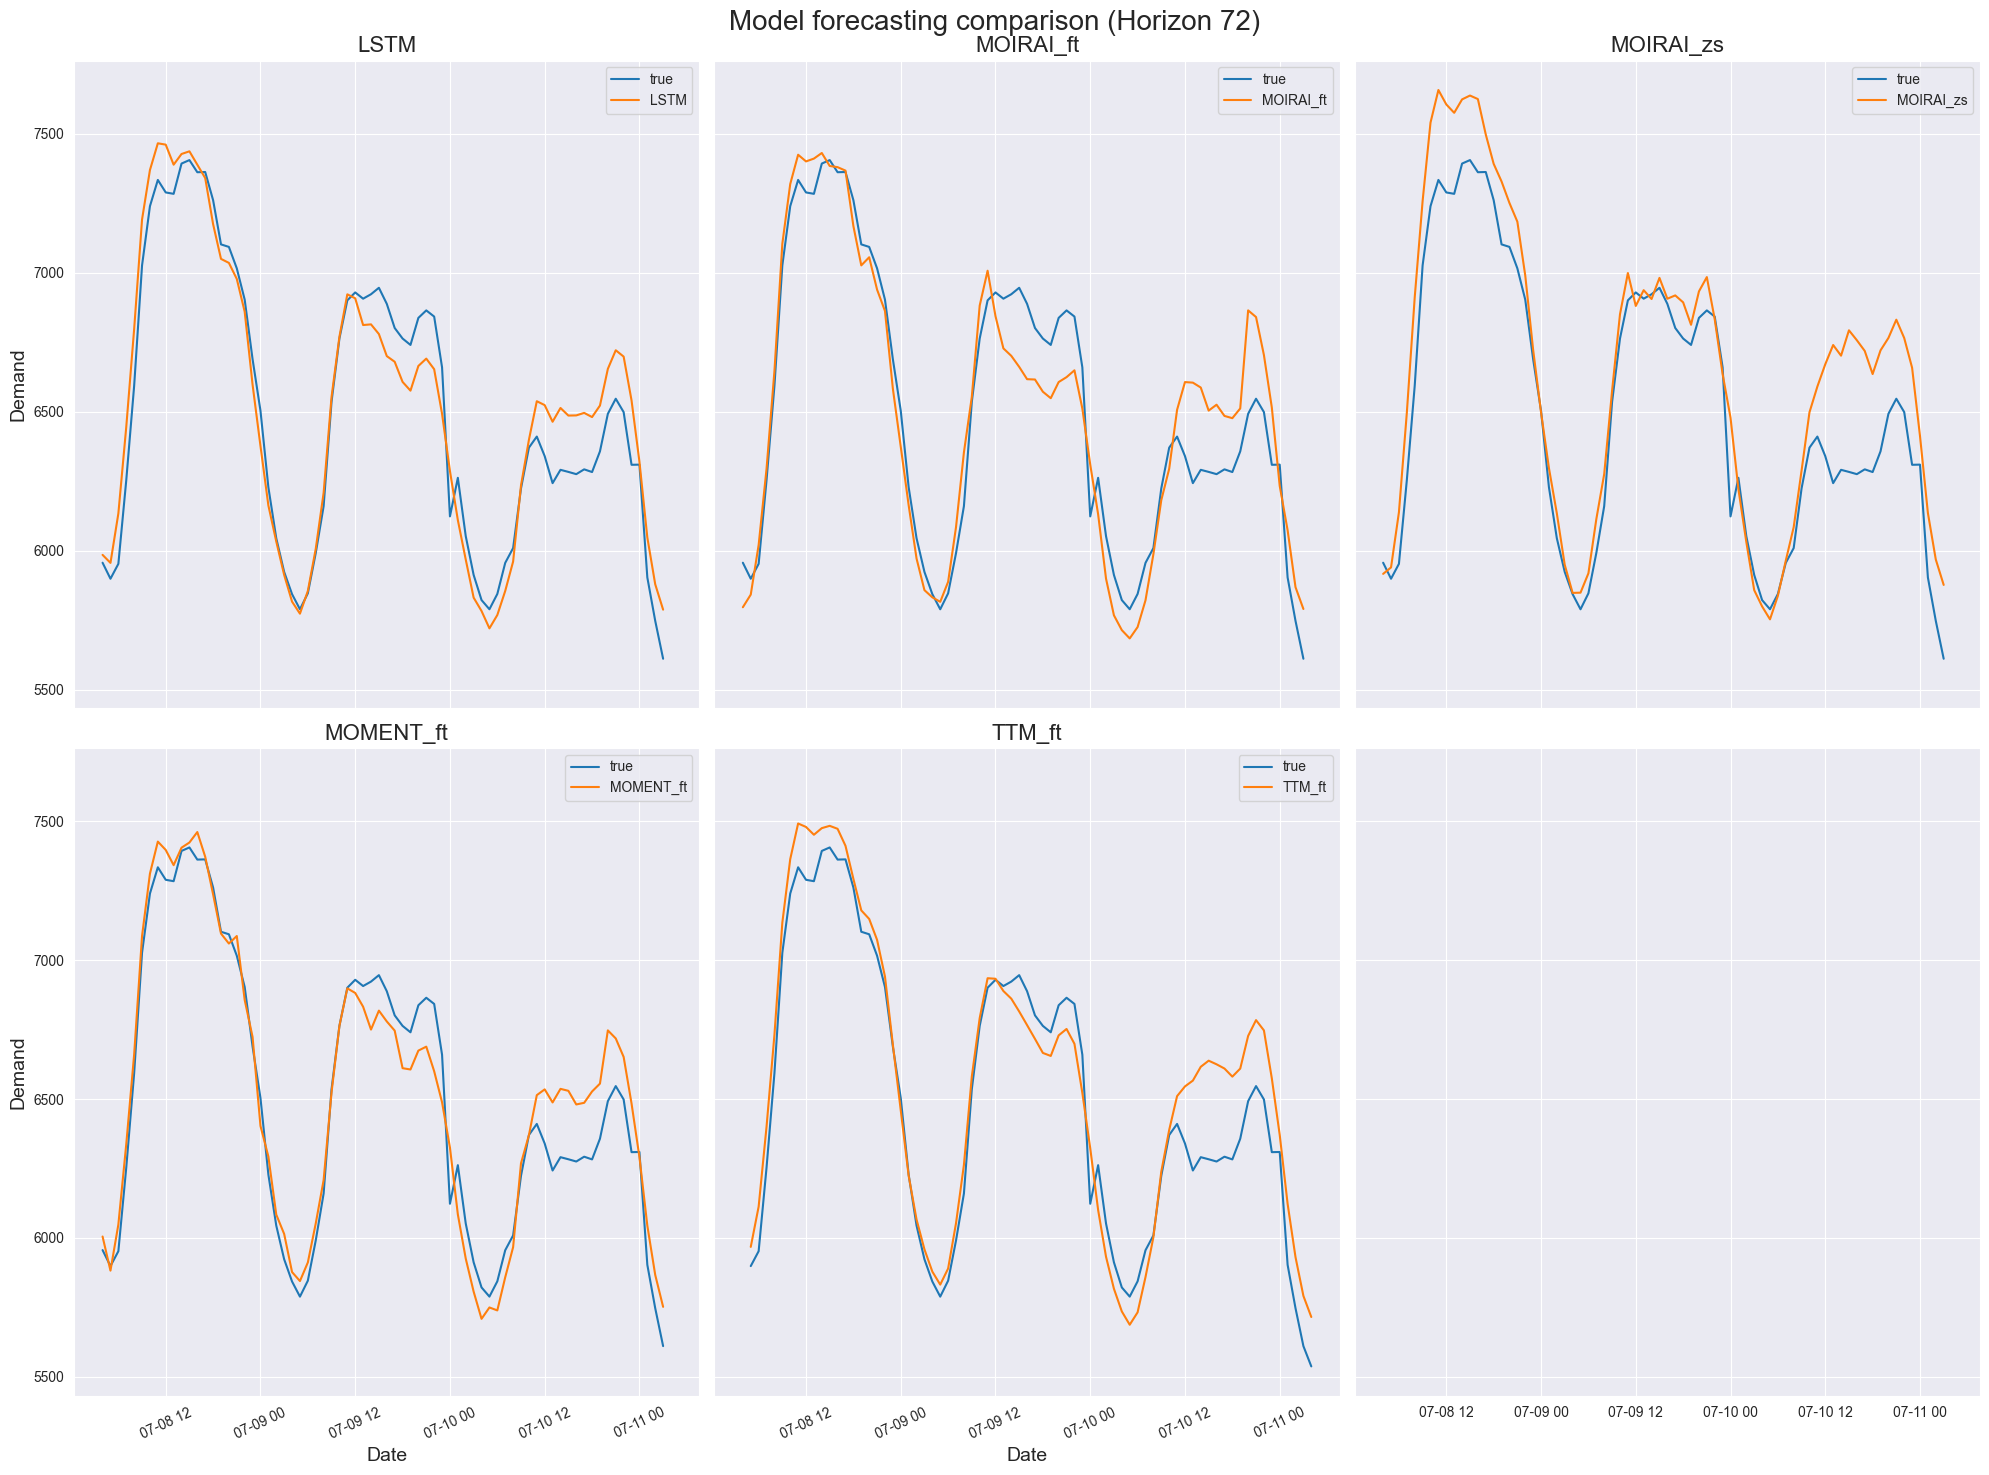

In [105]:
# indicate feature subset
features = 'top0'
dataset_path = results_path / dataset_name / features
model_names = os.listdir(dataset_path)

# exclude unwanted datasets
exclude = ['ARIMA', 'GARCH', 'ConvLSTM', 'GRU', 'GRUAttention']
model_names = [x for x in model_names if x not in exclude]

# load in all the datasets into a dictionary
datasets = {}
for model_name in model_names:
    model_path = dataset_path / model_name
    
    for filename in model_path.iterdir():
        if str(test_pl) in filename.name:
            df = pd.read_csv(filename)
            if 'date' in df:
                df['date'] = pd.to_datetime(df['date'])
                
            if any(x in filename.name for x in ['zero', 'base']):
                datasets[model_name + '_zs'] = df
            elif any(x in filename.name for x in ['tuned', 'fullshot', 'lp']):
                datasets[model_name + '_ft'] = df
            else:
                datasets[model_name] = df

# just because LSTM doesn't have a date column
if 'date' not in datasets['LSTM']:        
    datasets['LSTM']['date'] = datasets['MOMENT_ft']['date']
                
print(datasets.keys())

# randomly select a window of length `test_pl`
min_data_length = min([len(x) for x in datasets.values()])
window_num = random.randrange(min_data_length // test_pl)

win_start = window_num * test_pl
win_end = win_start + test_pl

# Create subplots
fig, axes = plt.subplots(math.ceil(len(datasets) / 3), 3, figsize=(20, 15), sharex=True, sharey=True)
fig.suptitle(f'Model forecasting comparison (Horizon {test_pl})', fontsize=20)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, (col, df) in enumerate(datasets.items()):
    # get the pred column name
    df = df.iloc[win_start:win_end]
    pred_col = [col for col in df.columns if 'pred' in col.lower() or 'actual' in col.lower()][0]
    
    sns.lineplot(data=df, x='date', y='true', ax=axes[i], label='true')
    sns.lineplot(data=df, x='date', y=pred_col, ax=axes[i], label=col, errorbar='pi')

    axes[i].set_title(f'{col}', fontsize=16)
    axes[i].set_xlabel('Date', fontsize=14)
    axes[i].set_ylabel('Demand', fontsize=14)
    axes[i].tick_params(axis='x', labelrotation=25)
    axes[i].legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Singapore, daily dataset

In [112]:
dataset_name = 'demand_sg_daily'
test_pl = 365

## All features

dict_keys(['LSTM', 'MOIRAI_ft', 'MOIRAI_zs', 'MOMENT_zs', 'MOMENT_ft'])


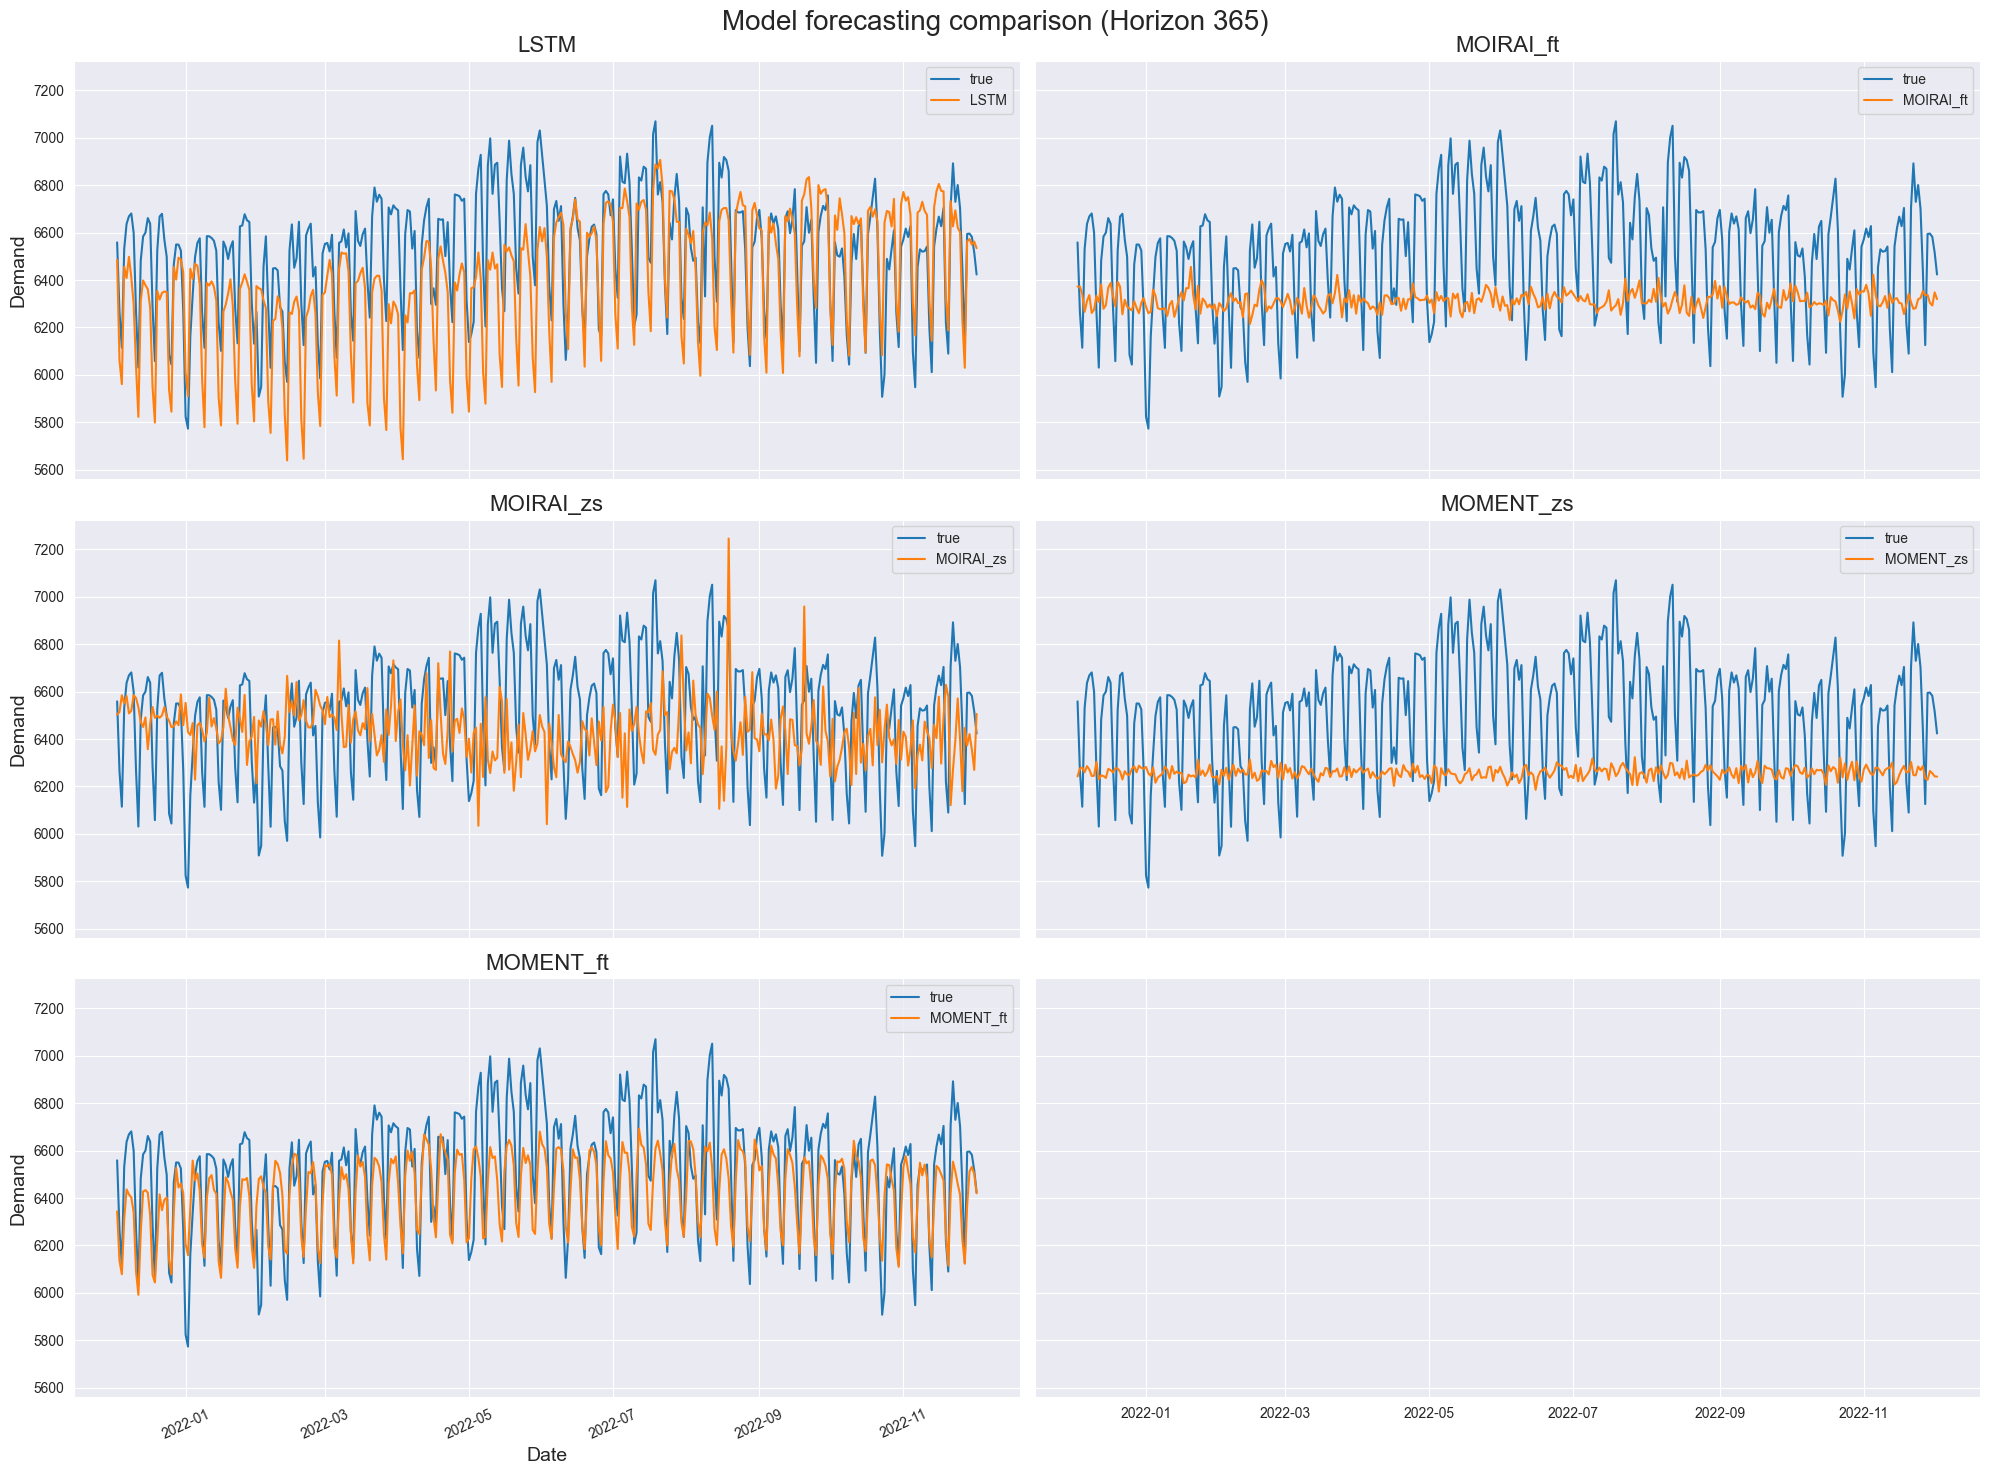

In [117]:
# indicate feature subset
features = 'all'
dataset_path = results_path / dataset_name / features
model_names = os.listdir(dataset_path)

# exclude unwanted datasets
exclude = ['ARIMA', 'GARCH', 'ConvLSTM', 'GRU', 'GRUAttention', 'TTM']
model_names = [x for x in model_names if x not in exclude]

# load in all the datasets into a dictionary
datasets = {}
for model_name in model_names:
    model_path = dataset_path / model_name
    
    for filename in model_path.iterdir():
        if str(test_pl) in filename.name:
            df = pd.read_csv(filename)
            if 'date' in df:
                df['date'] = pd.to_datetime(df['date'])
                
            if any(x in filename.name for x in ['zero', 'base']):
                datasets[model_name + '_zs'] = df
            elif any(x in filename.name for x in ['tuned', 'fullshot', 'lp']):
                datasets[model_name + '_ft'] = df
            else:
                datasets[model_name] = df

# just because LSTM doesn't have a date column
if 'date' not in datasets['LSTM']:        
    datasets['LSTM']['date'] = datasets['MOMENT_ft']['date']
                
print(datasets.keys())

# randomly select a window of length `test_pl`
min_data_length = min([len(x) for x in datasets.values()])
window_num = random.randrange(min_data_length // test_pl)

win_start = window_num * test_pl
win_end = win_start + test_pl

# Create subplots
fig, axes = plt.subplots(math.ceil(len(datasets) / 2), 2, figsize=(20, 15), sharex=True, sharey=True)
fig.suptitle(f'Model forecasting comparison (Horizon {test_pl})', fontsize=20)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, (col, df) in enumerate(datasets.items()):
    # get the pred column name
    df = df.iloc[win_start:win_end]
    pred_col = [col for col in df.columns if 'pred' in col.lower() or 'actual' in col.lower()][0]
    
    sns.lineplot(data=df, x='date', y='true', ax=axes[i], label='true')
    sns.lineplot(data=df, x='date', y=pred_col, ax=axes[i], label=col, errorbar='pi')

    axes[i].set_title(f'{col}', fontsize=16)
    axes[i].set_xlabel('Date', fontsize=14)
    axes[i].set_ylabel('Demand', fontsize=14)
    axes[i].tick_params(axis='x', labelrotation=25)
    axes[i].legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

## Historical target only

Oddly, LSTM performs horribly with condensed features in daily but not hourly. The performance for LSTM-sg-daily starts to wane after horizon 60. 
- Perhaps the `met` variable is extremely crucial at higher horizon lengths? But it shouldn't be the case, since it is very closely related to the target variable itself.

dict_keys(['LSTM', 'MOIRAI_ft', 'MOIRAI_zs', 'MOMENT_ft'])


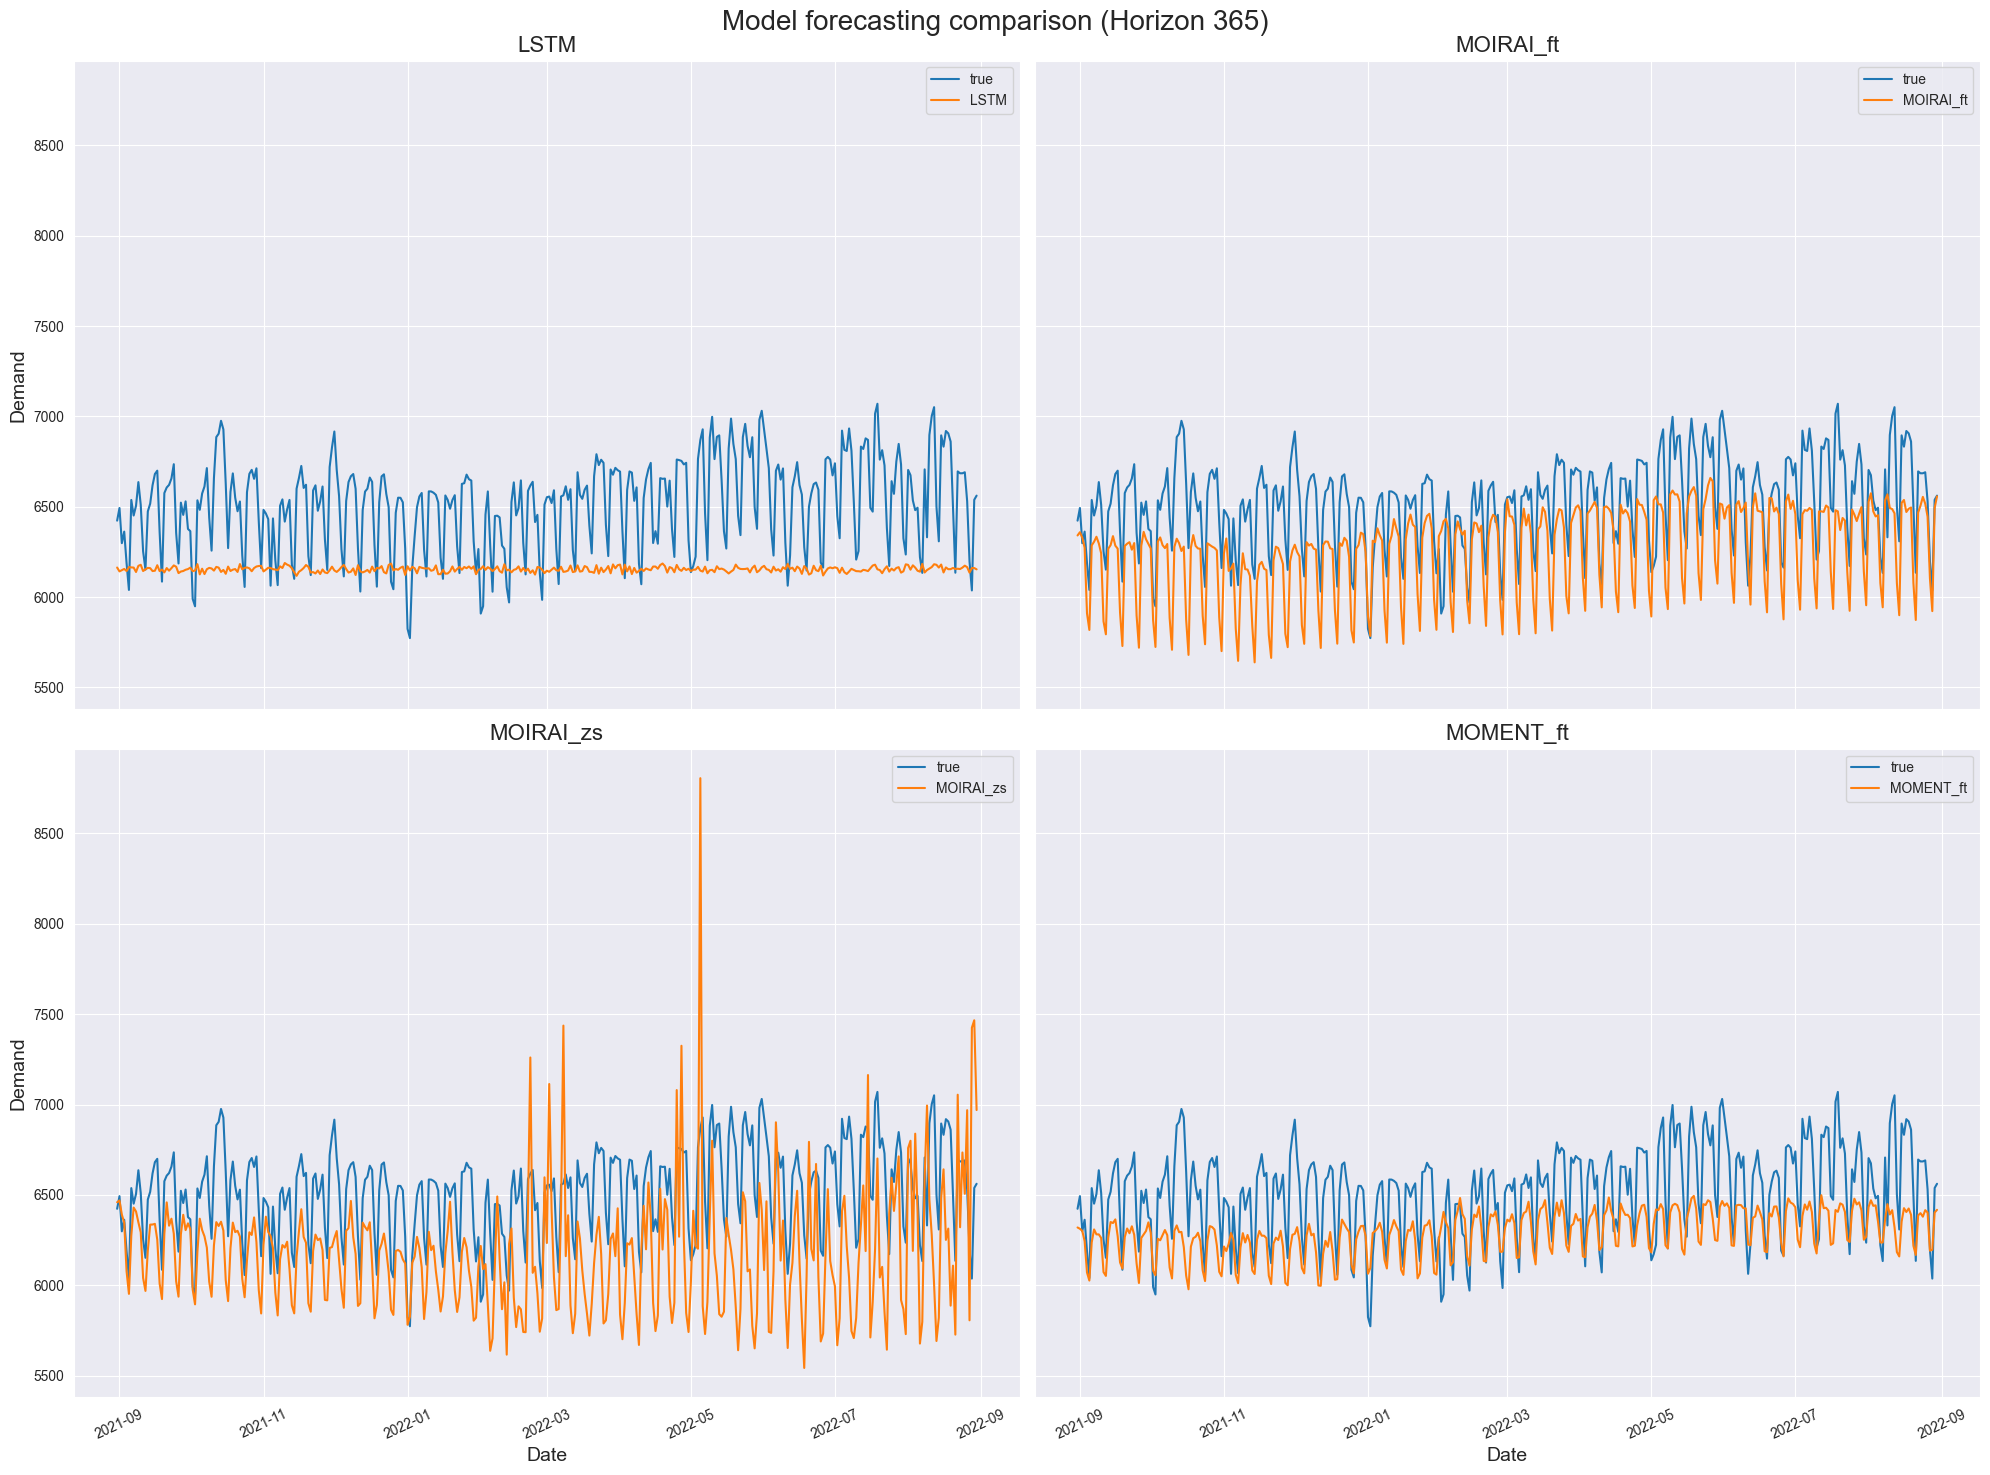

In [134]:
# indicate feature subset
features = 'top0'
dataset_path = results_path / dataset_name / features
model_names = os.listdir(dataset_path)

# exclude unwanted datasets
exclude = ['ARIMA', 'GARCH', 'ConvLSTM', 'GRU', 'GRUAttention', 'TTM']
model_names = [x for x in model_names if x not in exclude]

# load in all the datasets into a dictionary
datasets = {}
for model_name in model_names:
    model_path = dataset_path / model_name
    
    for filename in model_path.iterdir():
        if str(test_pl) in filename.name:
            df = pd.read_csv(filename)
            if 'date' in df:
                df['date'] = pd.to_datetime(df['date'])
                
            if any(x in filename.name for x in ['zero', 'base']):
                datasets[model_name + '_zs'] = df
            elif any(x in filename.name for x in ['tuned', 'fullshot', 'lp']):
                datasets[model_name + '_ft'] = df
            else:
                datasets[model_name] = df

# just because LSTM doesn't have a date column
if 'date' not in datasets['LSTM']:        
    datasets['LSTM']['date'] = datasets['MOMENT_ft']['date']
                
print(datasets.keys())

# randomly select a window of length `test_pl`
min_data_length = min([len(x) for x in datasets.values()])
window_num = random.randrange(min_data_length // test_pl)

win_start = window_num * test_pl
win_end = win_start + test_pl

# Create subplots
fig, axes = plt.subplots(math.ceil(len(datasets) / 2), 2, figsize=(20, 15), sharex=True, sharey=True)
fig.suptitle(f'Model forecasting comparison (Horizon {test_pl})', fontsize=20)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, (col, df) in enumerate(datasets.items()):
    # get the pred column name
    df = df.iloc[win_start:win_end]
    pred_col = [col for col in df.columns if 'pred' in col.lower() or 'actual' in col.lower()][0]
    
    sns.lineplot(data=df, x='date', y='true', ax=axes[i], label='true')
    sns.lineplot(data=df, x='date', y=pred_col, ax=axes[i], label=col, errorbar='pi')

    axes[i].set_title(f'{col}', fontsize=16)
    axes[i].set_xlabel('Date', fontsize=14)
    axes[i].set_ylabel('Demand', fontsize=14)
    axes[i].tick_params(axis='x', labelrotation=25)
    axes[i].legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()